# Using Growing Neural Gas to quantify diabetic retinopathy

[Chris von Csefalvay](mailto:csefalvayk@starschema.net) | [Starschema](https://starschema.net) | 27JAN2019

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#About-Growing-Neural-Gas-algorithms" data-toc-modified-id="About-Growing-Neural-Gas-algorithms-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>About Growing Neural Gas algorithms</a></span></li><li><span><a href="#The-GNG-algorithm" data-toc-modified-id="The-GNG-algorithm-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The GNG algorithm</a></span></li><li><span><a href="#Counting-hard-exudate-lesions-on-fundoscopy-photos-using-GNGs" data-toc-modified-id="Counting-hard-exudate-lesions-on-fundoscopy-photos-using-GNGs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Counting hard exudate lesions on fundoscopy photos using GNGs</a></span><ul class="toc-item"><li><span><a href="#Loading-the-image-files-and-basic-configuration" data-toc-modified-id="Loading-the-image-files-and-basic-configuration-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loading the image files and basic configuration</a></span></li><li><span><a href="#Loading-the-mask-and-applying-consensus-levels" data-toc-modified-id="Loading-the-mask-and-applying-consensus-levels-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Loading the mask and applying consensus levels</a></span></li><li><span><a href="#Filtering-ROI-for-hard-exudates-based-on-hue" data-toc-modified-id="Filtering-ROI-for-hard-exudates-based-on-hue-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Filtering ROI for hard exudates based on hue</a></span></li><li><span><a href="#Point-conversion" data-toc-modified-id="Point-conversion-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Point conversion</a></span></li><li><span><a href="#Apply-and-train-GNG" data-toc-modified-id="Apply-and-train-GNG-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Apply and train GNG</a></span><ul class="toc-item"><li><span><a href="#Create-helper-functions-for-analysis-of-resulting-GNG" data-toc-modified-id="Create-helper-functions-for-analysis-of-resulting-GNG-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Create helper functions for analysis of resulting GNG</a></span></li><li><span><a href="#Running-and-training-GNG" data-toc-modified-id="Running-and-training-GNG-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Running and training GNG</a></span></li></ul></li><li><span><a href="#Calculating-lesion-area" data-toc-modified-id="Calculating-lesion-area-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Calculating lesion area</a></span></li></ul></li><li><span><a href="#Comparing-all-subjects'-lesion-areas" data-toc-modified-id="Comparing-all-subjects'-lesion-areas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Comparing all subjects' lesion areas</a></span></li></ul></div>

## About Growing Neural Gas algorithms

Growing Neural Gas (GNG) is a relatively simple algorithm that, just as the other competitive model we have encountered in the previous chapter, allows for learning and representing topology. It is, thus, a form of a **topology-representing network**, and as we have seen in [Part 1](01_Funderstanding_competitive_neural_networks.ipynb), it is capable of approximating something as complex as the topology of a human face — producing something quite recognisable to a human observer while reducing information significantly. The animation to the left, for instance, demonstrates that something as complex as the human face can be approximated with significant efficiency to create an image that would be unmistakable to an observer.

![](assets/gng_principle.png)

## The GNG algorithm

\begin{definition}\label{def:gng_algo_1} **The Growing Neural Gas algorithm (1) – the GNG graph**

Let $\mathcal{G}$ be a Growing Neural Gas with $\delta$ inputs. Then, there exists a corrresponding graph $G = (V, E)$. 

At any time $t \ge 0$, $V(t)$ is a set of nodes $V_{1 \cdots m}$ and $E(t)$ a set of edges $E_{1 \cdots n}$.
\end{definition}

Note that in the above, the term 'node' is synonymous with 'neuron'.

\begin{definition}\label{def:gng_algo_2} **The Growing Neural Gas algorithm (cont. 2) – the weight vector of $V_i$ at $t$**

$V_i \in V$ at time $t$ is also associated with a $\delta$-element vector $\mathbf{v}_{i} (t)$. This is sometimes referred to as the weight vector of $V_i$ at $t$, and represents the position of $V_i$ in $\mathbb{R}^{\delta}$.

The distance between two nodes $V_i(t)$ and $V_j(t)$ is defined as

\begin{equation}\label{eq:dist}
\Delta\Big(V_i(t), V_j(t)\Big) = \sqrt{ \sum_{k = 1}^{\delta} (\mathbf{v}_{i}(t)_k - \mathbf{v}_{j}(t)_k)^2}
\end{equation}

\end{definition}

The use of 'weight vector' may be confusing. Unlike weight vectors in error correction networks, like feed-forward backpropagation neural nets, this weight wector does not have propagated weights. Rather, the 'weights' are simply a position vector that allows the algorithm to meaningfully approximate topologies by assigning a position in $\mathbb{R}^{\delta}$ space to each node (neuron).

\begin{definition}\label{def:gng_algo_3} **The Growing Neural Gas algorithm (cont. 3) – edges**

The edge between $V_i$ and $V_j$ is denoted $E_{i, j}$. 

The magnitude (length) of the edge $E_{i, j}$, represented by $\Vert E_{i, j} \Vert$, is defined as the distance between $E_i(t)$ and $E_j(t)$. Using the formula in Equation \ref{eq:dist},

\begin{equation}\label{eq:edge_length}
\Vert E_{i, j} \Vert = \Delta\Big(V_i(t), V_j(t)\Big) = \sqrt{ \sum_{k = 1}^{\delta} (\mathbf{v}_{i}(t)_k - \mathbf{v}_{j}(t)_k)^2}
\end{equation}

Each edge has an age. $\psi (E_{i, j})$ denotes the age of the edge $E_{i, j}$.

The edge operator $\mathbf{E}(V_i) \mid V_i \in V$ returns all edges emanating from $V_i$. Formally,

\begin{equation}\label{eq:edge_operator}
\mathbf{E}(V_i) = \{ E(V_i, x) \cup E(x, V_i) \mid x \in V \land x \neq V_i \}
\end{equation}

The adjacency operator $\mathbf{A}(V_i) \mid V_i in V$ returns all nodes connected to $V_i$. Formally, 

\begin{equation}\label{eq:adjacency_operator}
\mathbf{A}(V_i) = \{ x \mid E(V_i, x) \in V \lor E(x, V_i) \in V)
\end{equation}

\end{definition}

With that, let us consider the GNG algorithm itself.\cite{fritzke1995growing}

\begin{definition}\label{def:gng_algo} **The Growing Neural Gas algorithm (cont. 4) - algorithm**

Let $\mathcal{G}$ be a Growing Neural Gas initialised with $v_{init}$ nodes, with $v_{init} \ge 2$ and $\mathbf{v}_{1}(0) \cdots \mathbf{v}_{init}(0)$ being each randomly initialised.

Let further be defined a maximum age $\psi_{max}$, as well as a primary learning rate $\mu$ and a secondary learning rate $\mu^\prime$, with $\mu \ge \mu^\prime$, and an addition rate $\theta$, which specifies the frequency (in iterations) of inserting new neurons. A maximum number of neurons $N_{max}$ may be defined.

Let $D$ be an $\mathcal{l} \times \delta$ matrix, with each row containing the coordinates of a data point in $\mathbb{R}^{\delta}$ space.

\begin{enumerate}
    \item For iteration $t$, select a row $\mathbf{d}(t)$ from $D$.
    \item For each node $N \in V$, calculate the error by reference to Equation \ref{eq:dist}, i.e. $\Delta(\mathbf{d}(t), \mathbf{n}(t))$. Add this to the cumulative error $\Delta_{cum}(N)$, so that 
    \begin{equation}\label{eq:delta_cum}
    \Delta_{cum}(N) = \sum_{k = 1}^{t} \Delta(\mathbf{d}(k), \mathbf{n}(k))
    \end{equation}
    \item Determine the best-performing neuron (BPU) $N$, defined as $$ \underset{N \in V}{\operatorname{arg\ min}}\ \Delta \Big( \mathbf{d}, N \Big) $$ where $\Delta$ is the distance function laid out in Equation \ref{eq:dist}.
    \item Determine the second-best performing neuron $N^{\prime}$, defined as $$ \underset{N^\prime \in V \land N^\prime \neq N}{\operatorname{arg\ min}}\ \Delta \Big( \mathbf{d}, N^{\prime} \Big) $$ where, again, $\Delta$ is the distance function laid out in Equation \ref{eq:dist}.
    \item For all units in $\mathbf{E}(V_N)$, wherre $\mathbf{E}$ is the edge operator (see Equation \ref{eq:edge_operator}) increment the age of each edge by one.
    \item Move $N$ towards $\mathbf{d}$, so that $$\Delta(\mathbf{n}(t), \mathbf{n}(t + 1)) = \mu \Delta(\mathbf{d}(t), \mathbf{n}(t))$$.
    \item Move all nodes in $\mathbf{A}(N)$ towards $\mathbf{d}$, so that for any $A_p \in \mathbf{A}(N)$, $$\Delta(\mathbf{a_p}(t), \mathbf{a_p}(t + 1)) = \mu^\prime \Delta(\mathbf{d}(t), \mathbf{a_p}(t)) \mid A_p \in \mathbf{A}(N)$$
    \item If the edge $E_{N, N^\prime}$ exists, set $\psi(E_{N, N^\prime})$ to $0$. If the edge does not exist, create it.
    \item For every edge $E_{i, j}$ in $E$, remove $E_{i, j}$ if $\psi(E_{i, j}) > \psi_{max}$.
    \item For every node $N \in V$, if $\mathbf{E}(N) = \{\}$, remove $N$.
    \item If $t \mod \theta = 0$:
        \begin{enumerate}
            \item Determine the overall worst-peforming neuron $W$, defined as $$ \underset{W \in V}{\operatorname{arg\ max}}\ \Delta_{cum}(W) $$ where $\Delta_{cum}$ is the cumulative distance defined in Equation \ref{eq:delta_cum}.
            \item Determine the worst-performing neighbour $W^\prime$ of $W$, defined as $$ \underset{W^\prime \in \mathbf{A}(W)}{\operatorname{arg\ max}}\ \Delta_{cum}(W^\prime) $$ where $\Delta_{cum}$ is the cumulative distance defined in Equation \ref{eq:delta_cum}.
            \item Insert a new unit $H$ between $W$ and $W^\prime$, so that $$\mathbf{h} = \frac{1}{2} (\mathbf{w} + \mathbf{w}^\prime) $$ 
        \end{enumerate}
    \item Iterate until a given number of iterations is reached or, if defined, if $\Vert V \Vert = N_{max}$ is reached.
\end{enumerate}

\end{definition}

While this might appear convoluted, the algorithm is actually quite simple: every time a new data point is considered, the nearest point is moved towards it by a constant multiple of the distance and its connected neurons are pulled along, albeit by somewhat less. If this sounds familiar (from SOFMs), it should! What makes this neural gas model **growing** is the ability to insert points where the model performs worst. Unlike SOFMs, which have to make do with the grid they have been given, the growing neural gas can grow and adapt to its environment and like an actual gas, approximate and fill spaces. This is what we'll be leveraging in the following use case demonstration.

## Counting hard exudate lesions on fundoscopy photos using GNGs

Diabetic retinopathy, the destruction of the retinal blood vessels due to inadequate blood glucose control, is one of the leading causes of blindness in the developed world.\cite{bunce2006leading} In diabetic retinopathy, long term inadequate blood glucose control leads to vascular damage, microaneurysms and exudates, where lipids (causing bright yellow hard exudates) or blood (resulting in pale, diffuse yellow soft exudates) have accumulated on the fundus of the eye.\cite{fong2004retinopathy} In the following, we’ll be using GNG to quantify these abnormalities, and specifically count the number and area of lesions from a public fundoscopy dataset.\cite{kauppi2007diaretdb1}

The [DIARETDB1 data set](http://www2.it.lut.fi/project/imageret/diaretdb1/index.html) by the research group of Kauppi et al. (_op.cit._) at Lappeenranta University of Technology contains 89 digital fundoscopy images, that is, images of the fundus of the eye, of five healthy volunteers and 84 people with some degree of diabetic retinopathy. 36 of the images and all of the control images are negative for the presence of hard exudates altogether. The DIARETDB1 data set contains ROI (Region of Interest) masks, but those merely outline areas that show a particular clinical feature. Can we use Growing Neural Gas to count how many clusters of hard exudates are present in the regions of interest? You bet!

In [36]:
from skimage import color, io, filters, img_as_float, exposure, morphology
from scipy.misc import toimage
from scipy.spatial import ConvexHull
from scipy.stats import kde
import copy
import datetime
import json
import math
import random
import cv2
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from neupy import algorithms, environment
import pandas as pd
from tqdm import tqdm_notebook as tqdm

### Loading the image files and basic configuration



In this step, we're walking through the conversion and processing steps based on the data from a single subject. Subjects are identified by zero padded identifiers appended to images, e.g. the fundoscopy file `fundoscopies/image019.png` is the fundoscopy image of subject 019. We load the image as a float first:

In [3]:
SUBJECT_ID = 14

In [4]:
raw_image = img_as_float(io.imread(f"assets/fundoscopies/image{SUBJECT_ID:03}.png"))

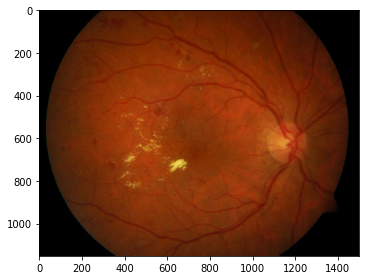

In [5]:
io.imshow(raw_image)
plt.show()

### Loading the mask and applying consensus levels

The masks, according to the specification,\cite{kauppi2007diaretdb1} contain the expert annotations as greyscale images where each expert's annotation is layered over the others, so that for $q$ experts, the intensity of a pixel with $p$-expert consensus will be $\frac{p}{q}$ (for greyscale values $[0, 1]$). The Kauppi _et al._ dataset has four levels of expert annotation,\cite{kauppi2007diaretdb1} and we will store the number of agreeing experts in the constant `EXPERT_CONCURRENCE_REQUIRED`.

\begin{definition}\label{def:expert_concurrence_masking} **Expert concurrence masking**

Let the source image $S$ be a matrix $\mathbb{R}^{m \times n}$ so that $R_{i, j} \in [0, 1] \ \forall \ i \in m \ \land \ j \in n$. 

Then the expert concurrence function for value ranges $[0, 1]$ is defined as the function $f : (\mathbb{Z}^{+}, \mathbb{Z}^{+}, \mathbb{R}^{m \times n}) \to \{ 0, 1 \}^{m \times n}$ so that

$$ f(p, q, S)_{i, j} = 
    \begin{cases}
     1 & \text{for } S_{i, j} \geq \frac{p}{q} \\
     0 & \text{for } S_{i, j} < \frac{p}{q} \\
    \end{cases} 
    $$

\end{definition}


In [6]:
EXPERT_CONCURRENCE_REQUIRED = 2

In [7]:
def convert_to_binary_mask(mask, **kwargs):
    expert_concurrence_required = kwargs.get("experts", EXPERT_CONCURRENCE_REQUIRED)
    binary_mask = mask > (expert_concurrence_required - 1) * 0.25
    
    structuring_element = kwargs.get("structuring_element", morphology.disk)
    structuring_element_size = kwargs.get("structuring_element_size", 16)
    
    return morphology.opening(binary_mask, structuring_element(structuring_element_size))

In [8]:
def mask_over_image(binary_mask, raw_image):
    return np.where(binary_mask[..., None], raw_image, 0)

In [9]:
def show_mask_process(mask, raw_img, **kwargs):
    fig, axarr = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    fig.subplots_adjust(hspace=0.5)
    cmap = kwargs.get("cmap", cm.plasma)
    experts_required = kwargs.get("experts", EXPERT_CONCURRENCE_REQUIRED)
    fig.suptitle(f"Expert consensus mask (subject {SUBJECT_ID}, {experts_required}-expert consensus)")
    
    axarr[0].imshow(mask, cmap=cmap)
    axarr[0].set_title("Raw expert image")
    
    axarr[1].imshow(convert_to_binary_mask(mask, **kwargs), cmap=cmap)
    axarr[1].set_title(f'Binary {experts_required}-expert voting mask')
    
    axarr[2].imshow(mask_over_image(convert_to_binary_mask(mask, **kwargs), raw_img))
    axarr[2].set_title("Region of interest based on mask")
    
    plt.show()

In [10]:
mask = img_as_float(io.imread(f"assets/hard_exudate_masks/image{SUBJECT_ID:03}.png"))
binary_mask = convert_to_binary_mask(mask)
masked_rgb = mask_over_image(binary_mask, raw_image)

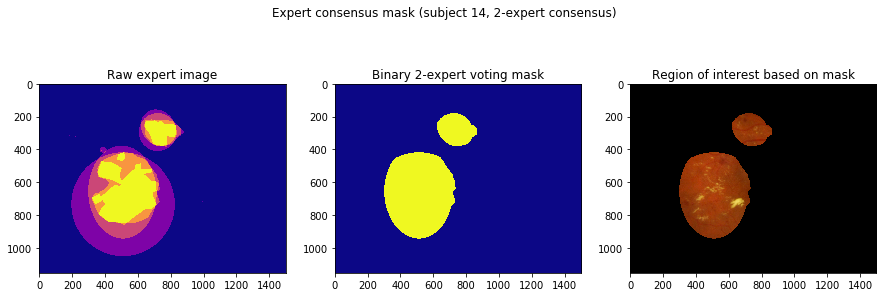

In [11]:
show_mask_process(mask, raw_image)

### Filtering ROI for hard exudates based on hue

Here, we're exploiting the fact that fatty exudates have a very prominent bright yellow colour, which can be easily narrowed down in HSV colour space.

In [12]:
def filter_for_hard_exudates(rgb_image, **kwargs):
    masked_hsv = cv2.cvtColor(np.float32(rgb_image), cv2.COLOR_RGB2HSV)
    lower_bound = kwargs.get("lower_bound", np.uint8([[[0, 0, 0]]]))
    upper_bound = kwargs.get("upper_bound", np.uint8([[[24, 255, 225]]]))

    structuring_element = kwargs.get("structuring_element", morphology.disk)
    structuring_element_size = kwargs.get("structuring_element_size", 6)
    
    hsv_mask = cv2.inRange(masked_hsv, lower_bound, upper_bound)
    hsv_mask = morphology.erosion(hsv_mask, structuring_element(structuring_element_size))
    hsv_mask = morphology.closing(hsv_mask, structuring_element(structuring_element_size))
    masked_hard_exudates = cv2.bitwise_or(masked_hsv, masked_hsv, mask = 255-hsv_mask)

    hard_exudates = cv2.cvtColor(masked_hard_exudates, cv2.COLOR_HSV2RGB)
    binary_hard_exudates = cv2.cvtColor(hard_exudates, cv2.COLOR_RGB2GRAY) > 0
    return (hard_exudates, binary_hard_exudates)

In [13]:
def plot_colour_process(raw_img, roi_img, hard_exudates, binary_hard_exudates, **kwargs):
    fig, axarr = plt.subplots(1, 4)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    fig.subplots_adjust(hspace=0.5)
    cmap = kwargs.get("cmap", cm.plasma)
    fig.suptitle(f"Colour filtering hard exudates (subject {SUBJECT_ID})")
    
    axarr[0].imshow(raw_img)
    axarr[0].set_title("Source image")

    axarr[1].imshow(roi_img)
    axarr[1].set_title("Region of Interest (RoI)")
    
    axarr[2].imshow(hard_exudates, cmap=cmap)
    axarr[2].set_title("Hard exudate extraction")

    axarr[3].imshow(binary_hard_exudates, cmap=cmap)
    axarr[3].set_title("Binary hard exudates")
   
    plt.show()

In [14]:
hard_exudates, hard_exudates_bw = filter_for_hard_exudates(masked_rgb)

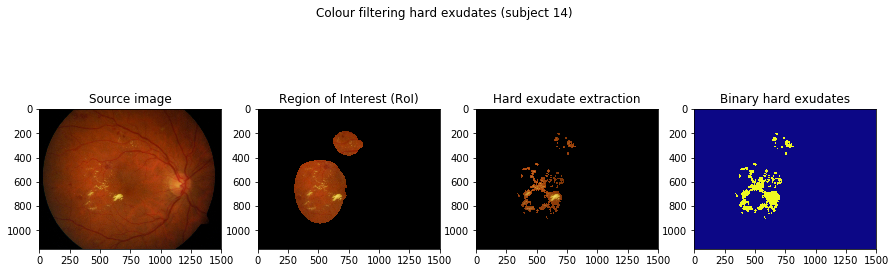

In [15]:
plot_colour_process(raw_image, masked_rgb, hard_exudates, hard_exudates_bw)

### Point conversion

This function converts the image to a point array, which is the requisite input for a GNG. Note that for reasons of processing ease, this will be flipped by 90 degrees – this is insignificant as GNG is rotation invariant.

In [16]:
def convert_bitmap_to_points(bitmap, included_point_fraction = 1.0):
    df = []
    for (x, y), val in np.ndenumerate(bitmap):
        if val == True and random.random() <= included_point_fraction:
            df.append([y, -x])
    return df

In [17]:
df = np.array(convert_bitmap_to_points(hard_exudates_bw, included_point_fraction=0.5))

Number of data points: 27,804


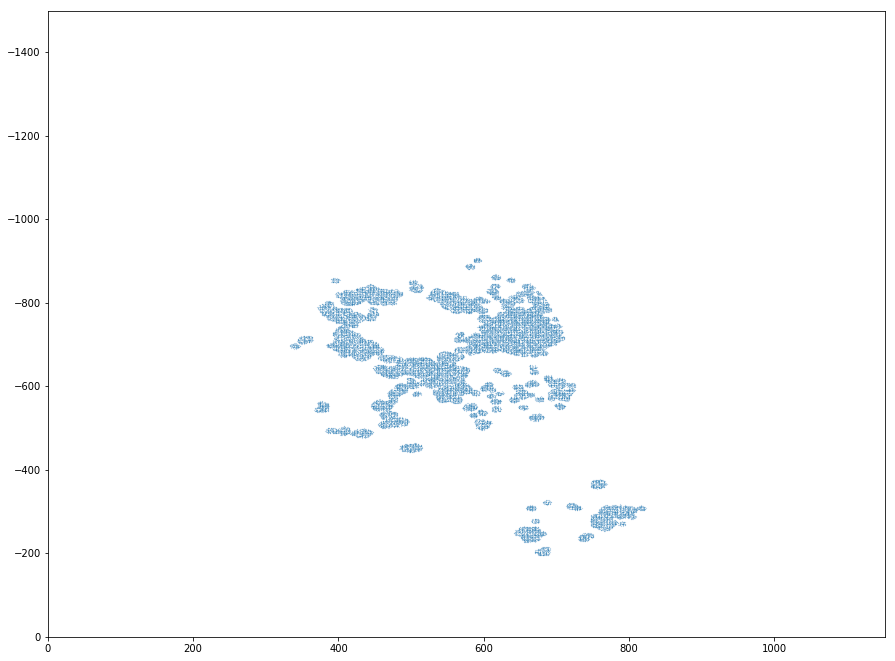

In [18]:
scale_factor = 1
data = scale_factor * np.array(df)
print("Number of data points: {:,}".format(len(data)))

plt.figure(figsize=(15, 11.52))
plt.xlim(0, hard_exudates.shape[0])
plt.ylim(0, -hard_exudates.shape[1])
plt.scatter(*(np.array(data).T) / scale_factor, s=0.01, alpha=1)
plt.show()

### Apply and train GNG

#### Create helper functions for analysis of resulting GNG

In [19]:
def extract_subgraphs(graph):
    subgraphs = []
    edges_per_node = copy.deepcopy(graph.edges_per_node)
    
    while edges_per_node:
        nodes_left = list(edges_per_node.keys())
        nodes_to_check = [nodes_left[0]]
        subgraph = []
        
        while nodes_to_check:
            node = nodes_to_check.pop()
            subgraph.append(node)

            if node in edges_per_node:
                nodes_to_check.extend(edges_per_node[node])
                del edges_per_node[node]
            
        subgraphs.append(subgraph)
        
    return subgraphs

In [20]:
class MarginClamp:
    def __init__(self, x_px = 1500, y_px = 1152, tolerance = 0.05, x_shift = 50, y_shift = 15):
        self.x_px = x_px
        self.y_px = y_px
        self.tolerance = tolerance
        self.x_shift = x_shift
        self.y_shift = y_shift
        
    def clamp(self, x, y):
        if x < self.tolerance * self.x_px:
            x = self.tolerance * self.x_px
        elif x > (1 - self.tolerance) * self.x_px - self.x_shift:
            x = (1 - self.tolerance) * self.x_px - self.x_shift

        if y < self.tolerance * self.y_px:
            y = self.tolerance * self.y_px
        elif y > (1 - self.tolerance) * self.y_px - self.y_shift:
            y = (1 - self.tolerance) * self.y_px - self.y_shift
        
        return (x, y)

In [21]:
def calculate_ideal_label_position(subgraph, x_px = 1500, y_px = 1152, preference = "centroid", label_length_offset=90, label_height_offset = 25):
    """
    @param preference: preferred location – options are "centroid", "middle", "corner"
    @type preference: str
    """
    
    assert preference in ["centroid", "middle", "corner"]
    
    clamp = MarginClamp(x_px = x_px, y_px = y_px, tolerance = 0.05, x_shift = label_length_offset, y_shift = label_height_offset)
    
    x_coords = [node.weight[0][0] for node in subgraph]
    y_coords = [-1 * node.weight[0][1] for node in subgraph]
    centroid = [np.mean(x_coords), np.mean(y_coords)]
    
    centroid_h = centroid[0] < x_px/2  # True => left quadrant, False => right quadrant
    centroid_v = centroid[1] < y_px/2  # True => top quadrant, False => bottom quadrant
    
    xmin, xmax = (np.min(x_coords), np.max(x_coords))
    ymin, ymax = (np.min(y_coords), np.max(y_coords))

    if preference == "centroid":
        x, y = (centroid[0], centroid[1])
        
    elif preference == "middle":
        if centroid[1] < 0.25 * y_px or centroid[1] > 0.75 * y_px:
            x = centroid[0] - label_length_offset/2
            y = ymin - label_height_offset if centroid[1]/y_px < 0.5 else ymax + label_height_offset
        else:
            y = centroid[1]
            x = xmin - label_length_offset if centroid[0]/x_px < 0.5 else xmax + label_length_offset
        
    else:  # => preference = "corner"
        if centroid_h:
            x = xmin - label_length_offset
        else:
            x = xmax
        
        if centroid_v:
            y = ymin - label_height_offset
        else:
            y = ymax + label_height_offset
            
    return clamp.clamp(x, y)

#### Running and training GNG

First, we're running a single subject's image with 20 starting nodes, 500 maximum nodes and 100 iterations:

In [22]:
environment.reproducible()

gng = algorithms.GrowingNeuralGas(
    n_inputs=2,
    n_start_nodes=20,
    shuffle_data=True,
    verbose=False,
    step=0.4,
    neighbour_step=0.005,
    max_edge_age=10,
    max_nodes=500,
    n_iter_before_neuron_added=3,
    after_split_error_decay_rate=0.5,
    error_decay_rate=0.995,
    min_distance_for_update=0.01)

In [ ]:
for i in tqdm(range(100)):
    gng.train(data, summary = 'inline', epochs = 1)

In [ ]:
fig = plt.figure(figsize=(15, 11.52))
ax = fig.add_subplot(111)

for (n1, n2) in gng.graph.edges:
    point_coordinates = np.concatenate(((n1.weight[0]*[1, -1]).round(), (n2.weight[0]*[1, -1]).round())).reshape(2, 2)
    plt.plot(point_coordinates.T[0], point_coordinates.T[1], linewidth = 0.5, color = "white", alpha = 0.5)

ax.imshow(hard_exudates)

ax.annotate(f"SUBJECT: {SUBJECT_ID:03}", xy=(50, 50), color="white")
ax.annotate(f"Lesion count: {len(extract_subgraphs(gng.graph))}", xy=(50, 90), color="white")
ax.annotate(f"Epochs: {gng.last_epoch}", xy=(50, 110), color="white")
ax.annotate(f"Final neuron count: {gng.graph.n_nodes}", xy=(50, 130), color="white")

for idx, val in enumerate(extract_subgraphs(gng.graph)):
    label_pos = calculate_ideal_label_position(val, preference="middle")
    ax.annotate(f"Lesion {idx + 1}", xy=label_pos, color="white")

plt.show()

### Calculating lesion area

The total lesion area allows a quantification of hard exudate severity. We can obtain this by calculating the convex hull area of the nodes in the pruned GNG graph:

In [ ]:
def single_lesion_area(*nodes):
    points = np.array([[node.weight[0][0], -node.weight[0][1]] for node in nodes])
    return ConvexHull(points).volume

In [ ]:
def total_lesion_area(graph):
    lesions = extract_subgraphs(graph)
    
    area = 0
    
    for lesion in lesions:
        try:
            area += single_lesion_area(*lesion)
        except Exception:
            pass
        
    return area

In [ ]:
print(f"The total lesion percentage is {total_lesion_area(gng.graph)/(1152*1500)*100:.2f}%.")

## Comparing all subjects' lesion areas

In the following, we will be iterating over all 89 fundoscopy images, and calculate the relative area covered by hard exudates. The relative area is calculated with reference to the entire image frame of 1152x1500 = 1,728,000 pixels (this is computationally more efficient than taking it as a fraction of the circular image it encloses). In addition, we'll also plot a heatmap of 

In [ ]:
def get_hard_exudate_image_and_mask(subject_id, **kwargs):
    raw_image = img_as_float(io.imread(f"assets/fundoscopies/image{subject_id:03}.png"))
    binary_mask = convert_to_binary_mask(img_as_float(io.imread(f"assets/hard_exudate_masks/image{subject_id:03}.png")))
    masked_rgb = mask_over_image(binary_mask, raw_image)
    
    return filter_for_hard_exudates(masked_rgb)

In [ ]:
def generate_points(hard_exudates_bw, **kwargs):
    return np.array(convert_bitmap_to_points(hard_exudates_bw, kwargs.get("included_point_fraction", 0.5)))

In [ ]:
hard_exudate_stats = []

In [ ]:
def plot_all_images(**kwargs):
    global hard_exudate_stats
    hard_exudate_stats = []
    row_count = kwargs.get("rows", 10)
    col_count = kwargs.get("cols", 9)
    sub_count = kwargs.get("first_n", 88)
    iter_count = kwargs.get("train_epochs", 50)
    max_neuron_count = kwargs.get("max_nodes", 500)

    fig, axarr = plt.subplots(row_count, col_count)
    fig.set_figheight(row_count * 2)
    fig.set_figwidth(col_count * 2)
    fig.subplots_adjust(hspace=0.5)
    cmap = kwargs.get("cmap", cm.plasma)
    fig.suptitle(
        f"Hard exudate mapping of {sub_count + 1} subjects from DIABRETDB1\n({iter_count} iterations, {max_neuron_count} neurons)"
    )

    for _ in tqdm(range(row_count * col_count)):
        row_id = math.floor(_ / col_count)
        col_id = _ % (row_count - 1)
        subject_id = _ + 1

        if int(_) <= kwargs.get("first_n", 88):
            img, bwimg = get_hard_exudate_image_and_mask(subject_id=subject_id)
            data = generate_points(bwimg, **kwargs)
            if len(data) > 3:

                environment.reproducible()

                gng = algorithms.GrowingNeuralGas(
                    n_inputs=2,
                    n_start_nodes=kwargs.get("start_nodes", 50),
                    shuffle_data=True,
                    verbose=False,
                    step=0.4,
                    neighbour_step=0.005,
                    max_edge_age=kwargs.get("max_edge_age", 4),
                    max_nodes=kwargs.get("max_nodes", 500),
                    n_iter_before_neuron_added=kwargs.get(
                        "n_iter_before_neuron_added", 3),
                    after_split_error_decay_rate=0.5,
                    error_decay_rate=0.995,
                    min_distance_for_update=0.01)

                gng.train(
                    data,
                    summary='inline',
                    epochs=kwargs.get("train_epochs", 50))
                axarr[row_id, col_id].axis('off')
                axarr[row_id, col_id].imshow(img)

                lesion_count = len(extract_subgraphs(gng.graph))
                lesion_area = total_lesion_area(
                    gng.graph) / (1152 * 1500) * 100

                hard_exudate_stats.append({
                    "subject": _,
                    "lesion_count": lesion_count,
                    "lesion_area": lesion_area,
                    "neurons": gng.graph.n_nodes
                })

                for (n1, n2) in gng.graph.edges:
                    point_coordinates = np.concatenate(
                        ((n1.weight[0] * [1, -1]).round(),
                         (n2.weight[0] * [1, -1]).round())).reshape(2, 2)
                    axarr[row_id, col_id].plot(
                        point_coordinates.T[0],
                        point_coordinates.T[1],
                        linewidth=0.5,
                        color="white",
                        alpha=0.3)

                axarr[row_id, col_id].set_title(
                    f"Subject {subject_id}: \n {lesion_count} @ {lesion_area:.3f}%",
                    fontsize=8,
                    color='black')

            else:
                axarr[row_id, col_id].axis('off')
                axarr[row_id, col_id].imshow(img)
                axarr[row_id, col_id].set_title(
                    f"Subject {subject_id}: \n no lesions",
                    fontsize=8,
                    color='green')
                hard_exudate_stats.append({
                    "subject": _,
                    "lesion_count": 0,
                    "lesion_area": 0.0,
                    "neurons": 0
                })

        else:
            axarr[row_id, col_id].axis('off')

        stat_table = pd.DataFrame.from_records(hard_exudate_stats)
        axarr[row_count - 1, col_count - 1].set_title(
            "Lesion count vs area", fontsize=8, color="black")

    y = stat_table["lesion_area"]
    x = stat_table["lesion_count"]
    nbins = kwargs.get("cva_bins", 300)

    k = kde.gaussian_kde([x, y])
    xi, yi = np.mgrid[x.min():x.max(
    ):nbins * 1j, y.min():y.max():nbins * 1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    axarr[row_count - 1, col_count - 1].pcolormesh(xi, yi,
                                                   zi.reshape(xi.shape))

    if "json_output" in kwargs:
        with open(kwargs.get("json_output"), 'w') as f:
            json.dump(hard_exudate_stats, f)

    if "csv_output" in kwargs:
        with open(kwargs.get("csv_output"), "w") as f:
            stat_table.to_csv(f)

    if "output" in kwargs:
        plt.savefig(kwargs.get("output"), dpi=kwargs.get("output_dpi", 150))

    plt.show()

In [ ]:
# Warning - running this can take considerable time!
plot_all_images(output="hard_exudates.png", csv_output="hard_exudates.csv", train_epochs=100, max_edge_age=8)

![](hard_exudates.png)

# References

[<a id="cit-fritzke1995growing" href="#call-fritzke1995growing">1</a>] B. Fritzke, ``_A growing neural gas network learns topologies_'', Advances in neural information processing systems,  1995.

[<a id="cit-bunce2006leading" href="#call-bunce2006leading">2</a>] Bunce Catey and Wormald Richard, ``_Leading causes of certification for blindness and partial sight in England \& Wales_'', BMC public health, vol. 6, number 1, pp. 58,  2006.

[<a id="cit-fong2004retinopathy" href="#call-fong2004retinopathy">3</a>] Fong Donald S, Aiello Lloyd, Gardner Thomas W <em>et al.</em>, ``_Retinopathy in diabetes_'', Diabetes care, vol. 27, number suppl 1, pp. s84--s87,  2004.

[<a id="cit-kauppi2007diaretdb1" href="#call-kauppi2007diaretdb1">4</a>] Kauppi Tomi, Kalesnykiene Valentina, Kamarainen Joni-Kristian <em>et al.</em>, ``_DIARETDB1-standard diabetic retino-pathy database_'', IMAGERET---Optimal Detection and Decision-Support Diagnosis of Diabetic Retinopathy, vol. , number , pp. ,  2007.

